In [1]:
from geneformer import EmbExtractor
from geneformer.emb_extractor import EMB_device
from geneformer.tokenizer import TOKEN_DICTIONARY_FILE

print("in_silico_perturber.py:\t{}".format(EMB_device))
print("tonenizer.py:\t\t{}".format(TOKEN_DICTIONARY_FILE))

2023-12-20 11:23:25.101563: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-20 11:23:26.041051: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


in_silico_perturber.py:	cuda:0
tonenizer.py:		/mnt/keita/data/scRNA-datas/mouse_datas/in_silico/kidney/small_datas/in_silico_small_kidney_token_dictionary.pkl


In [5]:
import numpy as np

from datasets import load_from_disk

dataset_name = "/path/to/input/data/xxx.dataset"
dataset = load_from_disk(dataset_name)
print(dataset)


disease_types = np.unique(dataset["disease"])
print(disease_types)
print(disease_types.shape[0])

Dataset({
    features: ['input_ids', 'cell_type', 'organ_major', 'disease', 'length'],
    num_rows: 248623
})
['autosomal dominant polycystic kidney disease' 'diabetic kidney disease'
 'normal']
3


In [6]:
# initiate EmbExtractor
# "model_type": {"Pretrained","GeneClassifier","CellClassifier"}

use_model_type = "CellClassifier"

embex = EmbExtractor(
    model_type=use_model_type,
    num_classes=disease_types.shape[0],
    filter_data=None,
    max_ncells=1000,
    emb_layer=0,
    emb_label=["disease"],
    labels_to_plot=["disease"],
    forward_batch_size=200,
    nproc=16,
)


model_name = "your fine tuning model"

import os

DIR_NAME = "/path/to/output/directory/"
if not os.path.exists(DIR_NAME):
    os.mkdir(DIR_NAME)


# extracts embedding from input data
# example dataset: https://huggingface.co/datasets/ctheodoris/Genecorpus-30M/tree/main/example_input_files/cell_classification/disease_classification/human_dcm_hcm_nf.dataset


embs = embex.extract_embs(
    "/path/to/fine/tunign/model/{}/".format(model_name),
    dataset_name,
    "/path/to/output/directory",
    "cell_embed_{}".format(use_model_type),
)

  0%|          | 0/1244 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


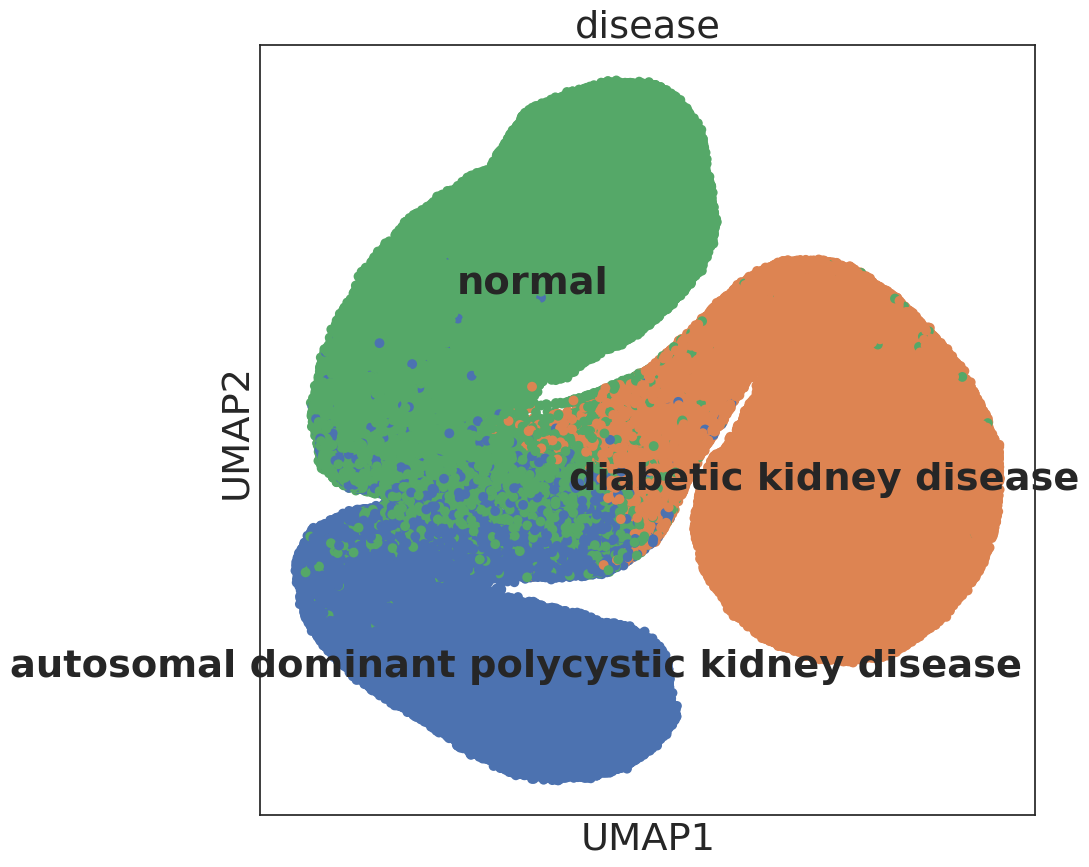

In [7]:
# plot UMAP of cell embeddings
# note: scanpy umap necessarily saves figs to figures directory


embex.plot_embs(
    embs=embs,
    plot_style="umap",
    output_directory="/path/to/output/directory/",
    output_prefix="emb_plot_{}".format(dataset_name),
)

/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 2250x2250 with 0 Axes>

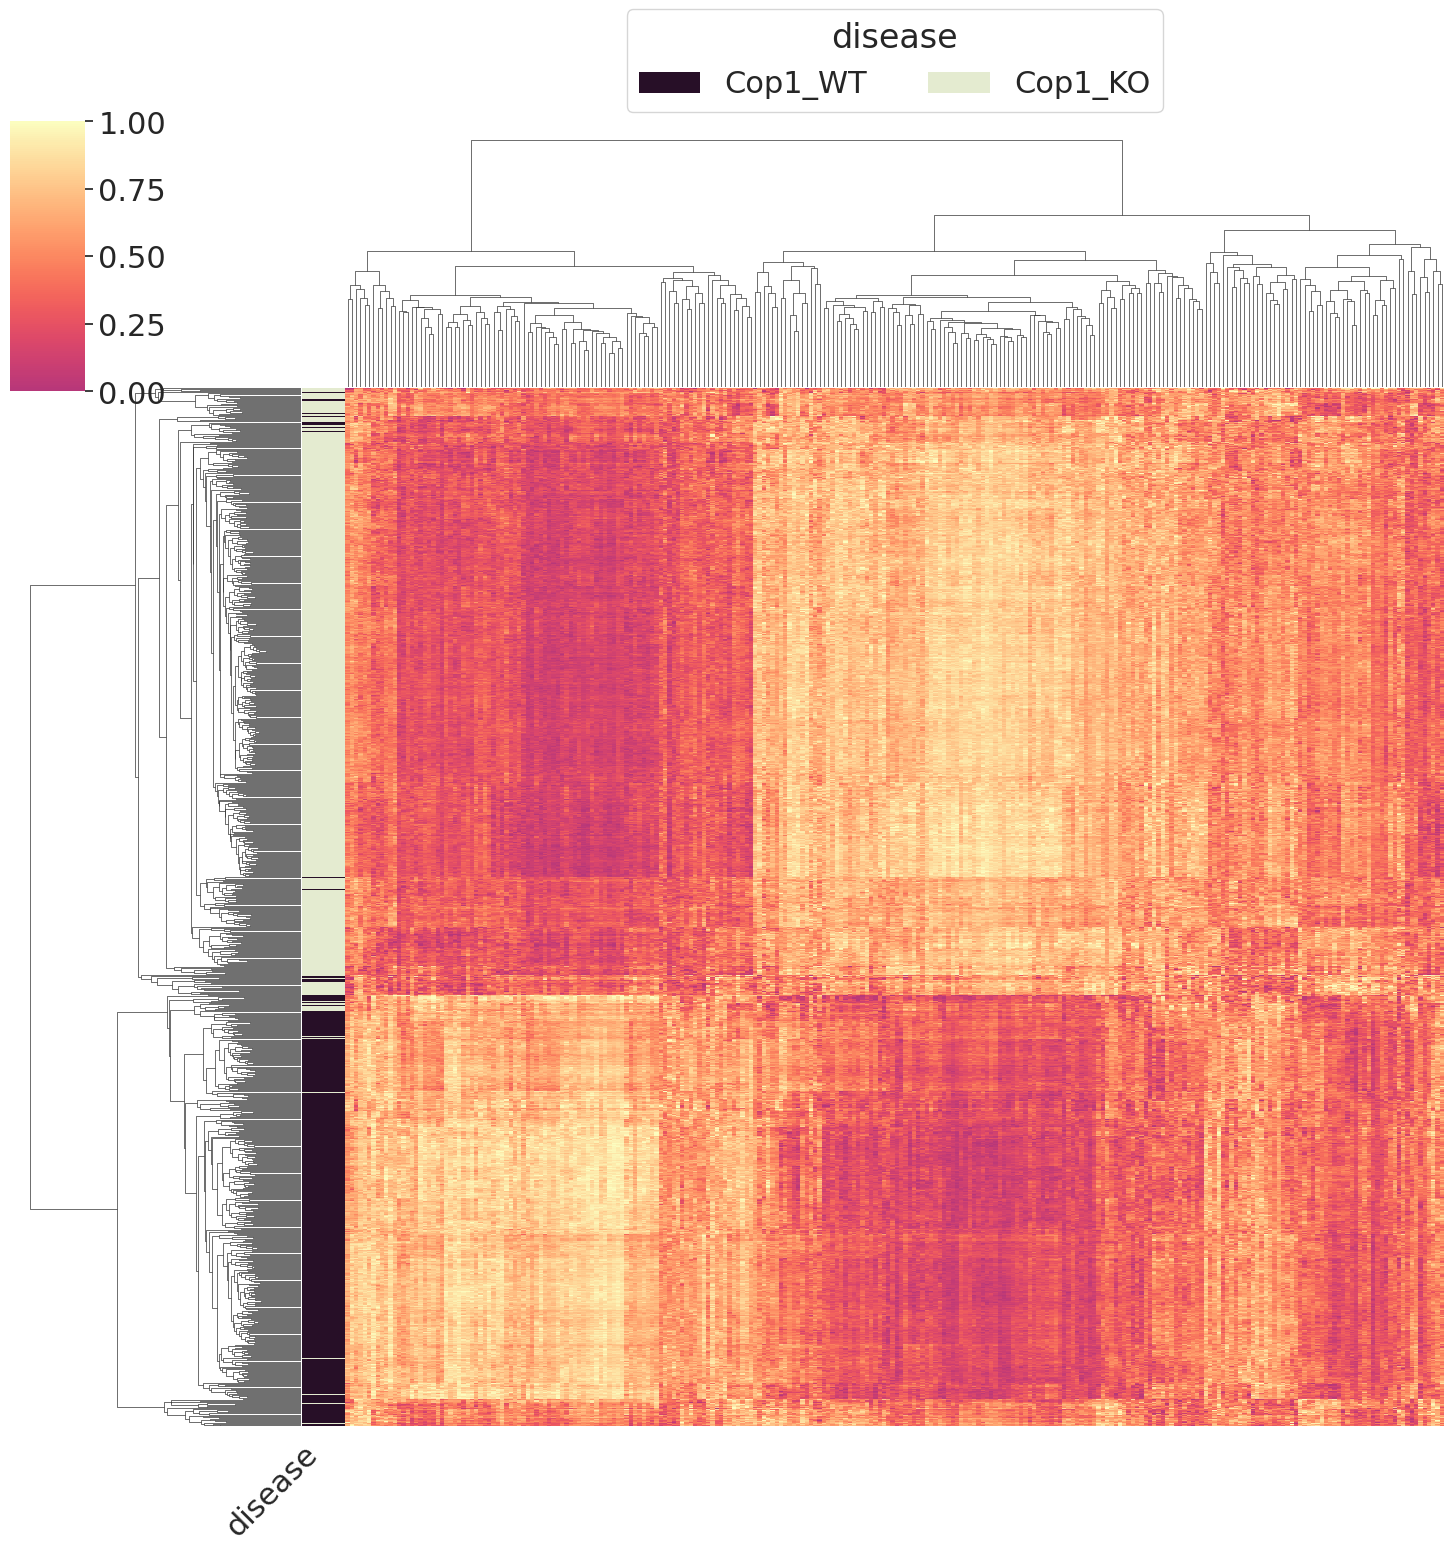

In [6]:
# plot heatmap of cell embeddings
embex.plot_embs(
    embs=embs,
    plot_style="heatmap",
    output_directory="/path/to/output/directory/",
    output_prefix="heatmap_emb_plot_{}".format(dataset_name),
)